In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('glass.csv')
# data

In [3]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

In [4]:
std_scaling= StandardScaler()
std_scaling.fit(data.drop('Type',axis=1))

StandardScaler()

In [5]:
std_scaled=std_scaling.transform(data.drop('Type',axis=1))

# making DataFrame
scaled_data = pd.DataFrame(std_scaled,columns=data.columns[:-1])
# scaled_data

In [6]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,data['Type'],test_size=0.2)

In [7]:
#knn algo.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)

In [8]:
np.mean(pred==y_test)

0.7209302325581395

In [9]:
#prediction and evaluation
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[11,  1,  2,  0,  0,  0],
       [ 0, 12,  3,  0,  0,  0],
       [ 1,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  1,  4]], dtype=int64)

In [10]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.80      0.75      0.77        16
           3       0.25      0.17      0.20         6
           5       1.00      1.00      1.00         1
           6       0.50      0.67      0.57         3
           7       0.80      0.80      0.80         5

    accuracy                           0.72        43
   macro avg       0.69      0.72      0.70        43
weighted avg       0.70      0.72      0.71        43



In [11]:
error_rate=[]
for i in range(1,40):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.28, 0.26, 0.26, 0.33, 0.35, 0.37, 0.35, 0.37, 0.3, 0.28, 0.28, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.37, 0.35, 0.33, 0.33, 0.35, 0.4, 0.37, 0.42, 0.4, 0.4, 0.35, 0.4, 0.4, 0.37, 0.42, 0.42, 0.42, 0.37, 0.4, 0.37, 0.44, 0.44]


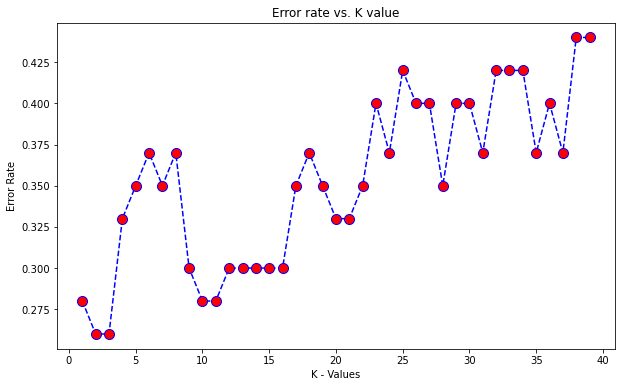

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error rate vs. K value')
plt.show()

In [13]:
# use k=2:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)
print('accuracy =',np.mean(pred==y_test))

print(confusion_matrix(y_test,pred))

print(classification_report(pred,y_test))

accuracy = 0.7441860465116279
[[13  0  1  0  0  0]
 [ 2 12  1  0  0  0]
 [ 3  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  0  1  1  0]
 [ 0  0  0  0  1  4]]
              precision    recall  f1-score   support

           1       0.93      0.72      0.81        18
           2       0.80      0.86      0.83        14
           3       0.25      0.33      0.29         3
           5       1.00      0.50      0.67         2
           6       0.25      0.50      0.33         2
           7       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.67      0.65      0.64        43
weighted avg       0.80      0.74      0.76        43



In [14]:
# when k=2, accuracy is 74%